## Reference
Data Camp course

## Course Description
* A typical organization loses an estimated 5% of its yearly revenue to fraud. 
* Apply supervised learning algorithms to detect fraudulent behavior similar to past ones,as well as unsupervised learning methods to discover new types of fraud activities. 
* Deal with highly imbalanced datasets. 
* The course provides a mix of technical and theoretical insights and shows you hands-on how to practically implement fraud detection models. 
* Tips and advise from real-life experience to help you prevent making common mistakes in fraud analytics.
* Examples of fraud: insurance fraud, credit card fraud, identify theft, money laundering, tax evasion, product warranty, healthcare fraud.  

## Introduction and preparing your data

* Typical challenges associated with fraud detection.
* Resample your data in a smart way, to tackle problems with imbalanced data.  

### Checking the fraud to non-fraud ratio
* Fraud occurrences are fortunately an extreme minority in these transactions.
* However, Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as **class imbalance** (or skewed class), and it's one of the main challenges of fraud detection.

In [1]:
import pandas as pd
df = pd.read_csv("creditcard_sampledata_3.csv") 
#This is dieferent from the data in the course. But it will be corrected
#in the following cells.

occ = df['Class'].value_counts() #good for counting categorical data
print(occ)
print(occ / len(df.index))

0    5000
1      50
Name: Class, dtype: int64
0    0.990099
1    0.009901
Name: Class, dtype: float64


### Plotting your data
Visualize the fraud to non-fraud ratio. 

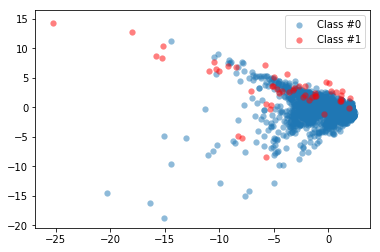

5000

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("creditcard_sampledata_3.csv")
#print(df.columns) #It is not df.colnames. 
df = df.drop(['Unnamed: 0'],axis = 1)
# print(df.head())
y=df['Class'].values
X=df.drop(['Class'],axis = 1).values

def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

# X, y = prep_data(df) #original code 

plot_data(X, y)
len(X[y==0,0])


### Applying SMOTE
* Re-balance the data using the Synthetic Minority Over-sampling Technique (SMOTE). 
* Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. 
* Visualize the result and compare it to the original data, such that we can see the effect of applying SMOTE very clearly.

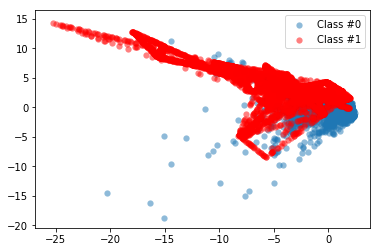

(5050, 29)
(5050,)


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
df = pd.read_csv("creditcard_sampledata_3.csv")
#print(df.columns) #It is not df.colnames. 
df = df.drop(['Unnamed: 0'],axis = 1)
# print(df.head())
y=df['Class'].values
X=df.drop(['Class'],axis = 1).values
#my code above

method = SMOTE(kind='regular')
X_resampled, y_resampled = method.fit_sample(X, y)
plot_data(X_resampled, y_resampled)
print(X.shape)
print(y.shape)

### Compare SMOTE to original data
* Compare those results of SMOTE to the original data, to get a good feeling for what has actually happened.
* Have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. * Use the function compare_plot() (not defined here), which takes the following arguments: X, y, X_resampled, y_resampled, method=''. The function plots the original data in a scatter plot, along with the resampled side by side.

In [37]:
print(pd.value_counts(pd.Series(y)))

print(pd.value_counts(pd.Series(y_resampled)))

compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')
# This fundtion is not defined here. But the result picture is as below
#The compare_plot should be implemented by the subplot defined on dataframe, or by the subplot way summarized elsewhere. 

0    5000
1      50
dtype: int64
1    5000
0    5000
dtype: int64


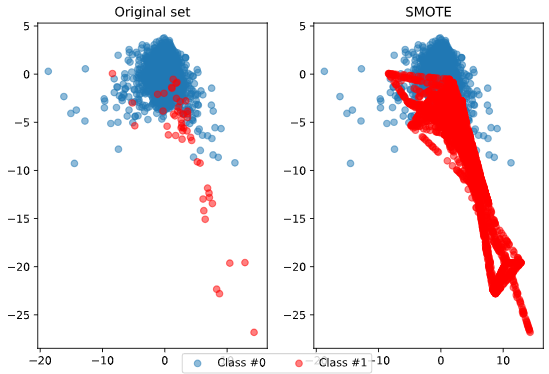

### Exploring the traditional way to catch fraud
* Try finding fraud cases in our credit card dataset the "old way". First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

* Statistical thresholds are often determined by looking at the mean values of observations. 
* Check whether feature means differ between fraud and non-fraud cases. Then, use that information to create common sense thresholds.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
df = pd.read_csv("creditcard_sampledata_3.csv")
#print(df.columns) #It is not df.colnames. 
df = df.drop(['Unnamed: 0'],axis = 1)
#print(df.head())
y=df['Class'].values
X=df.drop(['Class'],axis = 1).values
#my code above

# Run a groupby command on our labels and obtain the mean for each feature
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


Not bad, with this rule, we detect 22 out of 50 fraud cases, but can't detect the other 28, and get 16 false positives. In the next exercise, we'll see how this measures up to a machine learning model.  

### Using ML classification to catch fraud
* Use a simple machine learning model on our credit card data instead.
* Implement a Logistic Regression model. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

C:\Users\ljyan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.89      0.80      0.84        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


* We are getting much less false positives, so that's an improvement. 
* We're catching a higher percentage of fraud cases, so that is also better than before. 

### Logistic regression combined with SMOTE

In [10]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### Using a pipeline
Treat the pipeline as if it were a single machine learning model. Our data X and y are already defined, and the pipeline is defined in the previous exercise. 

In [11]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.67      1.00      0.80        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.83      1.00      0.90      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1500    5]
 [   0   10]]


C:\Users\ljyan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* The SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives, albeit only 7 cases.
* Remember, not in all cases does resampling necessarily lead to better results. **When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias.** Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly. 
* In the next chapters, we'll learn how to also adjust our machine learning models to better detect the minority fraud cases.

## Fraud detection using labelled data
* Flag fraudulent transactions with supervised learning. 
* Use classifiers, adjust them and compare them to find the most efficient fraud detection model.

### Natural hit rate
* Explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. 
* It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. 
* Create a random forest classifier for fraud detection. That will serve as the "baseline" model that you're going to try to improve in the upcoming exercises.

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
df = pd.read_csv("creditcard_sampledata_2.csv")
#print(df.columns) #It is not df.colnames. 
df = df.drop(['Unnamed: 0'],axis = 1)
# print(df.head())
y=df['Class'].values
X=df.drop(['Class'],axis = 1).values
#extra code above

# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)


95.8904109589041


This tells us that by doing nothing, we would be correct in 95.9% of the cases.  So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct. 

### Random Forest Classifier - part 1

In [46]:
print(X.shape)
print(y.shape)

(7300, 29)
(7300,)


In [47]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestClassifier(random_state=5) 

### Random Forest Classifier - part 2
See how our Random Forest model performs without doing anything special to it.  

In [13]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)

C:\Users\ljyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(accuracy_score(y_test, predicted))

C:\Users\ljyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9908675799086758


### Performance metrics for the RF model
* In the previous exercises you obtained an accuracy score for your random forest model. This time, we know accuracy can be misleading in the case of fraud detection. 
* With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly. So let's get these performance metrics.
* Continue working on the same random forest model from the previous exercise. The model, defined as model = RandomForestClassifier(random_state=5) has been fitted to the training data already, and X_train, y_train, X_test, y_test are available.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

predicted = model.predict(X_test)

probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9397777068096268
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.97      0.80      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2097    2]
 [  18   73]]


You have now obtained more meaningful performance metrics that tell us how well the model performs, given the highly imbalanced data that you're working with. The model predicts 76 cases of fraud, out of which 73 are actual fraud. You have only 3 false positives. This is really good, and as a result you have a very high precision score. You do however, don't catch 18 cases of actual fraud. Recall is therefore not as good as precision. Let's try to improve that in the following exercises.  

### Plotting the Precision Recall Curve
* Plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

* The Random Forest Classifier is available as model, and the predictions as predicted. You can simply obtain the average precision score and the PR curve from the sklearn package. T

* The function plot_pr_curve() plots the results.

In [50]:
from sklearn.metrics import average_precision_score
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)  

In [ ]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)
#This function is unavailable. 

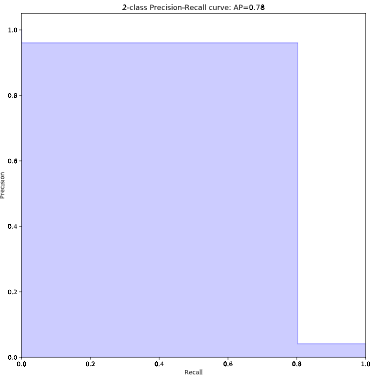

### Model adjustments
* A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the **class_weights option **when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.

* Explore the weight = "balanced_subsample" mode the Random Forest model from the earlier exercise. 

In [52]:
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9463271364176556
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  18   73]]


C:\Users\ljyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


* The model results don't improve drastically. We now have 3 less false positives, but now 19 in stead of 18 false negatives, i.e. cases of fraud we are not catching. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try. 
* In the next exercises we will see how to more smartly tweak your model to focus on reducing false negatives and catch more fraud.  


### Adjusting your Random Forest to fraud detection
* Explore the options for the random forest classifier, as we'll assign weights and tweak the shape of the decision trees in the forest. 
* Define weights manually, to be able to off-set that imbalance slightly. In our case we have 300 fraud to 7000 non-fraud cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on.


In [53]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
            max_depth=10, 
            min_samples_leaf=10, 
                               
            # Change the number of trees to use
            n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
# get_model_results(X_train, y_train, X_test, y_test, model)
#This function fits the model to your training data, predicts and obtains performance metrics 
#similar to the steps you did in the previous exercises.

* By smartly defining more options in the model, you can obtain better predictions. You have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low. 
* In this exercise you've manually changed the options of the model. There is a smarter way of doing it, by using GridSearchCV, which you'll see in the next exercise!  

### GridSearchCV to find optimal parameters
With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, you can optimize your model settings to get the **best possible Recall score.** If you also cared about reducing the number of false positives, you could optimize on F1-score, this gives you that nice Precision-Recall trade-off.  

In [1]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'], 'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

model = RandomForestClassifier(random_state=5)

CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

CV_model.fit(X_train, y_train)
CV_model.best_params_

NameError: name 'RandomForestClassifier' is not defined

### Model results using GridSearchCV
* You discovered that the best parameters for your model are that the split criterion should be set to 'gini', the number of estimators (trees) should be 30, the maximum depth of the model should be 8 and the maximum features should be set to "log2".

* Let's give this a try and see how well our model performs. You can use the get_model_results() function again to save time.

In [55]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
# get_model_results(X_train, y_train, X_test, y_test, model)

<script.py> output:
                  precision    recall  f1-score   support
    
             0.0       0.99      1.00      1.00      2099
             1.0       0.95      0.84      0.89        91
    
       micro avg       0.99      0.99      0.99      2190
       macro avg       0.97      0.92      0.94      2190
    weighted avg       0.99      0.99      0.99      2190
    
    [[2095    4]
     [  15   76]]

* The number of false positives has now been slightly reduced even further, which means we are catching more cases of fraud. 
* However, you see that the number of false positives actually went up. That is that Precision-Recall trade-off in action. 
* To decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with. Ultimately, this final decision should be made by you and the fraud team together.  

### Logistic Regression
* Combine three algorithms into one model with the VotingClassifier. This allows us to benefit from the different aspects from all models, and hopefully improve overall performance and detect more fraud. The first model, the Logistic Regression, has a slightly higher recall score than our optimal Random Forest model, but gives a lot more false positives.
* You'll also add a Decision Tree with balanced weights to it. The data is already split into a training and test set, i.e. X_train, y_train, X_test, y_test are available.
* In order to understand how the Voting Classifier can potentially improve your original model, you should check the standalone results of the Logistic Regression model first.

In [57]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
# get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2099
         1.0       0.63      0.88      0.73        91

`   micro avg       0.97      0.97      0.97      2190
   macro avg       0.81      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190
`

`
[[2052   47]
 [  11   80]]
`

The Logistic Regression has quite different performance from the Random Forest. More false positives, but also a better Recall. It will therefore will a useful addition to the Random Forest in an ensemble model. 

### Voting Classifier
* Combine three machine learning models into one, to improve our Random Forest fraud detection model from before. You'll combine our usual Random Forest model, with the Logistic Regression from the previous exercise, with a simple Decision Tree. 
* Use the short cut get_model_results() to see the immediate result of the ensemble model.  

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
# get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

<script.py> output:
                  precision    recall  f1-score   support
    
             0.0       0.99      1.00      0.99      2099
             1.0       0.90      0.86      0.88        91
    
       micro avg       0.99      0.99      0.99      2190
       macro avg       0.95      0.93      0.94      2190
    weighted avg       0.99      0.99      0.99      2190
    
    [[2090    9]
     [  13   78]]


* By combining the classifiers, you can take the best of multiple models. You've increased the cases of fraud you are catching from 76 to 78, and you only have 5 extra false positives in return.
* If you do care about catching as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. 
* The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives. By combining these together you indeed managed to improve performance.  

### Adjust weights within the Voting Classifier
* The Voting Classifier allows you to improve your fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights you can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

* The data is already split into a training and test set, and clf1, clf2 and clf3 are available and defined as before, i.e. they are the Logistic Regression, the Random Forest model and the Decision Tree respectively.

In [59]:
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
# get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

<script.py> output:
                  precision    recall  f1-score   support
    
             0.0       0.99      1.00      1.00      2099
             1.0       0.94      0.85      0.89        91
    
       micro avg       0.99      0.99      0.99      2190
       macro avg       0.97      0.92      0.94      2190
    weighted avg       0.99      0.99      0.99      2190
    
    [[2094    5]
     [  14   77]]

The weight option allows you to play with the individual models to get the best final mix for your fraud detection model. Now that you have finalized fraud detection with supervised learning, let's have a look at how fraud detection can be done when you don't have any labels to train on.  

## Fraud detection using unlabelled data
* Use unsupervised learning techniques to detect fraud. 
* Segment customers, use K-means clustering and other clustering algorithms to find suspicious occurrences in your data.  

### Exploring your data
* Look at bank payment transaction data. 
* Distinguish normal from abnormal (thus potentially fraudulent) behavior. As a fraud analyst to understand what is "normal", you need to have a good understanding of the data and its characteristics. 

In [60]:
import pandas as pd
df = pd.read_csv('banksim.csv')
df = df.drop(['Unnamed: 0'],axis = 1)
print(df.head())
print(df.groupby('category').mean())

  age gender           category  amount  fraud
0   3      F  es_transportation   49.71      0
1   4      F          es_health   39.29      0
2   3      F  es_transportation   18.76      0
3   4      M  es_transportation   13.95      0
4   2      M  es_transportation   49.87      0
                           amount     fraud
category                                   
es_barsandrestaurants   43.841793  0.022472
es_contents             55.170000  0.000000
es_fashion              59.780769  0.020619
es_food                 35.216050  0.000000
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_hotelservices       172.756245  0.548387
es_hyper                46.788180  0.125000
es_leisure             229.757600  1.000000
es_otherservices       149.648960  0.600000
es_sportsandtoys       157.251737  0.657895
es_tech                132.852862  0.179487
es_transportation       27.422014  0.000000
es_travel              231.818656  0.944444
es_wellnessand

Even from simple group by, we can find that the majority of fraud is observed in travel, leisure and sports related transactions. 

### Customer segmentation
* Check whether there are any obvious patterns for the clients in this data, thus whether you need to segment your data into groups, or whether the data is rather homogenous.

* There is not a lot client information available; However, there is data on **age ** available, so let's see whether there is any significant difference between behavior of age groups.

In [61]:
# Group by age groups and get the mean
print(df.groupby('age').mean())

        amount     fraud
age                     
0    49.468935  0.050000
1    35.622829  0.026648
2    37.228665  0.028718
3    37.279338  0.023283
4    36.197985  0.035966
5    37.547521  0.023990
6    36.700852  0.022293
U    39.117000  0.000000


In [62]:
# Group by age groups and get the mean
df.groupby('age').mean()

# Count the values of the observations in each age group
print(df['age'].value_counts())

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64


* Does it make sense to divide your data into age segments before running a fraud detection algorithm?  
* No, the age groups who are the largest are relatively similar. As you can see the average amount spent as well as fraud occurrence is rather similar across groups. Age group '0' stands out but since there are only 40 cases, it does not make sense to split these out in a separate group and run a separate model on them.  

### Using statistics to define normal behavior
* In the previous exercises we saw that fraud is more prevalent in certain transaction categories, but that there is no obvious way to segment our data into for example age groups.
* This time, let's investigate the average amounts spend in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.

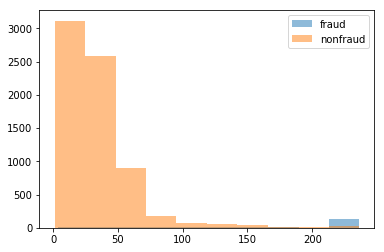

In [63]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

* As the number fraud observations is much smaller, it is difficult to see the full distribution. 
* Nonetheless, you can see that the fraudulent transactions tend to be on the larger side relative to normal observations.
* This helps us later in detecting fraud from non-fraud. In the next chapter you're going to implement a clustering model to distinguish between normal and abnormal transactions, when the fraud labels are no longer available.  

### Scaling the data
For ML algorithms using distance based metrics, it is crucial to always scale your data, as features using different scales will distort your results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore you first need to scale your data before continuing to implement the algorithm. 

In [67]:
import pandas as pd
df = pd.read_csv('banksim_adj.csv')
X = df.drop(['Unnamed: 0'],axis = 1).values
y = df['fraud'].values
print(df.head())
#extra code above. The data might not be same as the DataCamp


from sklearn.preprocessing import MinMaxScaler

X = np.array(df).astype(np.float)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

   Unnamed: 0  age  amount  fraud  M  es_barsandrestaurants  es_contents  \
0           0    3   49.71      0  0                      0            0   
1           1    4   39.29      0  0                      0            0   
2           2    3   18.76      0  0                      0            0   
3           3    4   13.95      0  1                      0            0   
4           4    2   49.87      0  1                      0            0   

   es_fashion  es_food  es_health  es_home  es_hotelservices  es_hyper  \
0           0        0          0        0                 0         0   
1           0        0          1        0                 0         0   
2           0        0          0        0                 0         0   
3           0        0          0        0                 0         0   
4           0        0          0        0                 0         0   

   es_leisure  es_otherservices  es_sportsandtoys  es_tech  es_transportation  \
0           0    

### K-means clustering
* For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. 
* However, fraud data is oftentimes very large, especially when you are working with transaction data. MiniBatch K-means is an efficient way to implement K-means on a large dataset, which you will use in this exercise.

In [68]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

### Elbow method
* It is important to get the number of clusters right, especially when you want to **use the outliers of those clusters as fraud predictions**. 
* Apply the Elbow method and see what the optimal number of clusters should be based on this method.

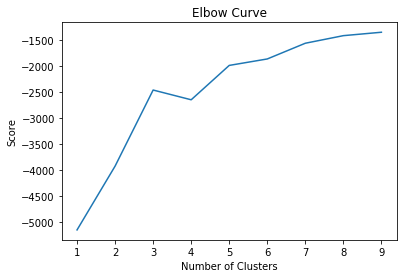

In [69]:
clustno = range(1, 10)

kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

The optimal number of clusters should probably be at around 3 clusters, as that is where the elbow is in the curve. 

### Detecting outliers
* Use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to sense check our results.

* The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. 
* How to determine the cut-off in this exercise. 


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]
# np.linagl.norm calculate the 'norm' of a vector or a matrix. 


# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

print(len(X_test))
print(len(X_test_clusters))
print(X_test_clusters)
print('--------------------')
print(X_test_clusters_centers)
print(len(dist))

2157
2157
[2 1 1 ... 2 2 2]
--------------------
[[0.46208979 0.50503256 0.11993546 0.0071048  1.         0.01243339
  0.0017762  0.01420959 0.02664298 0.         0.         0.0017762
  0.01243339 0.         0.0017762  0.0053286  0.0017762  0.89520426
  0.        ]
 [0.58159793 0.49215686 0.36850912 0.18823529 0.27058824 0.06470588
  0.00588235 0.05294118 0.28823529 0.3        0.01764706 0.00588235
  0.02941176 0.         0.         0.08235294 0.01764706 0.
  0.01764706]
 [0.49623688 0.494003   0.11833627 0.005997   0.         0.
  0.         0.0029985  0.00749625 0.         0.         0.00149925
  0.0029985  0.         0.         0.00149925 0.00149925 0.97901049
  0.        ]]
2157


### Checking model results
In the previous exercise you've flagged all observations to be fraud, if they are in the top 5th percentile in distance from the cluster centroid. I.e. these are the very outliers of the three clusters. For this exercise you have the scaled data and labels already split into training and test set, so y_test is available. The predictions from the previous exercise, km_y_pred, are also available. Let's create some performance metrics and see how well you did.

In [79]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))
#output: 0.8197704982668266

0.934936176504411


In [81]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
# plot_confusion_matrix(km_cm)

0.934936176504411


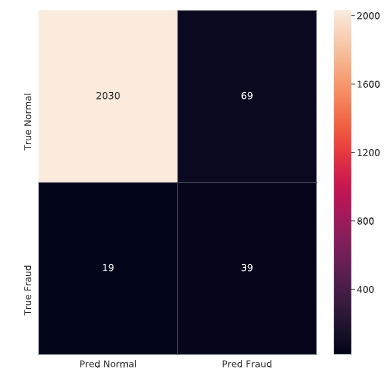

Question  
If you were to decrease the percentile used as a cutoff point in the previous exercise to 93% instead of 95%, what would that do to your prediction results?   
The number of fraud cases caught increases, but false positives also increase.  

### DB scan
* Explore using a density based clustering method (DBSCAN) to detect fraud. The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. 
* This time, you are **not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as fraud**. You again have the scaled dataset, i.e. X_scaled available. 

In [ ]:
from sklearn.cluster import DBSCAN

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# # Print performance metrics for DBscan
# print('Estimated number of clusters: %d' % n_clusters)
# print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
# print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

output:  
`
Estimated number of clusters: 18
Homogeneity: 0.633
Silhouette Coefficient: 0.707
`  

The number of clusters is much higher than with K-means. For fraud detection this is for now OK, as we are only interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and decide which one to flag as fraud. 

### Assessing smallest clusters
* Check the clusters that came out of DBscan, and flag certain clusters as fraud:
* Figure out how big the clusters are, and filter out the smallest. Then take the smallest ones and flag those as fraud.  
* Check with the original labels whether this does actually do a good job in detecting fraud.  

Available are the DBscan model predictions, so n_clusters is available as well as the cluster labels, which are saved under pred_labels. 

In [84]:
counts = np.bincount(pred_labels[pred_labels >= 0])

print(counts)


[3252  105 2714   46  174  119  112   79   52   74   43   24   45   42
   11   19   16   13   10   15   35   10   40   19   11]


output:
    [3252  145 2714   55  174  119  122   98   54   15   76   15   43   25
       51   47   42   15   25   20   19   10]


In [ ]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

output:
    The smallest clusters are clusters:
    [21 17  9]  

In [85]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

Their counts are:
[10 10 11]


<script.py> output:
    Their counts are:
    [10 15 15]  
    
 So now we know which smallest clusters you could flag as fraud. If you were to take more of the smallest clusters, you cast your net wider and catch more fraud, but most likely also more false positives. It is up to the fraud analyst to find the right amount of cases to flag and to investigate. In the next exercise you'll check the results with the actual labels.  
 
### Checking results
In this exercise you're going to check the results of your DBscan fraud detection model. In reality, you often don't have reliable labels and this where a fraud analyst can help you validate the results. He/She can check your results and see whether the cases you flagged are indeed suspicious. You can also check historically known cases of fraud and see whether your model flags them.

In this case, you'll use the fraud labels to check your model results. The predicted cluster numbers are available under pred_labels as well as the original fraud labels labels. 

In [ ]:
# Create a dataframe of the predicted cluster numbers and fraud labels
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21) | (df['clusternr']==17) | (df['clusternr']==9), 1, 0)

# Run a crosstab on the results 
print(pd.crosstab(df.fraud, df.predicted_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

output:  
`    Flagged Fraud     0   1
    Actual Fraud           
    0              6973  16
    1               176  24
    `

How does this compare to the K-means model?
* The good thing is: our of all flagged cases, roughly 2/3 are actually fraud! Since you only take the three smallest clusters, by definition you flag less cases of fraud, so you catch less but also have less false positives. However, you are missing quite a lot of fraud cases. 
* Increasing the amount of smallest clusters you flag could improve that, at the cost of more false positives of course. 

## Fraud detection using text
Use text data, text mining and topic modeling to detect fraudulent behavior.  

### Word search with dataframes
* Work with text data, containing emails from Enron employees. 
* Using string operations on dataframes, you can easily sift through messy email data and create flags based on word-hits.

In [87]:
import pandas as pd
df = pd.read_csv('enron_emails_clean.csv',index_col = 0)
# Find all cleaned emails that contain 'sell enron stock'
mask = df['clean_content'].str.contains('sell enron stock', na=False)
# Select the data from df that contain the searched for words 
print(df.loc[mask])

                                                                    From  \
Message-ID                                                                 
<6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')   

                                                                      To  \
Message-ID                                                                 
<6336501.1075841154311.JavaMail.evans@thyme>  ('sarah.palmer@enron.com')   

                                                             Date  \
Message-ID                                                          
<6336501.1075841154311.JavaMail.evans@thyme>  2002-02-01 14:53:35   

                                                                                        content  \
Message-ID                                                                                        
<6336501.1075841154311.JavaMail.evans@thyme>  \nJoint Venture: A 1997 Enron Meeting Belies O...   

                                    

### Using list of terms
* Search on more than one term. 
* Create a full "fraud dictionary" of terms that could potentially flag fraudulent clients and/or transactions. Fraud analysts often will have an idea what should be in such a dictionary. In this exercise you're going to flag a multitude of terms, and in the next exercise you'll create a new flag variable out of it. The 'flag' can be used either directly in a machine learning model as a feature, or as an additional filter on top of your machine learning model results. 

In [89]:
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df.loc[df['clean_content'].str.contains('|'.join(searchfor), na=False)]
# print(filtered_emails)

### Creating a flag
This time you are going to create an actual flag variable that gives a 1 when the emails get a hit on the search terms of interest, and 0 otherwise. This is the last step you need to make in order to actually use the text data content as a feature in a machine learning model, or as an actual flag on top of model results. You can continue working with the dataframe df containing the emails, and the searchfor list is the one defined in the last exercise.  


In [90]:
import numpy as np
# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

0    1776
1     314
Name: flag, dtype: int64


You have now managed to search for a list of strings in several lines of text data. These skills come in handy when you want to flag certain words based on what you discovered in your topic model, or when you know beforehand what you want to search for. In the next exercises you're going to learn how to clean text data and to create your own topic model to further look for indications of fraud in your text data.  

### Removing stopwords
In the following exercises you're going to clean the Enron emails, in order to be able to use the data in a topic model. Text cleaning can be challenging, so you'll learn some steps to do this well. The dataframe containing the emails df is available. In a first step you need to define the list of stopwords and punctuations that are to be removed in the next exercise from the text data. Let's give it a try. 

In [91]:
# Import nltk packages and string 
from nltk.corpus import stopwords 
import string

# Define stopwords to exclude
stop = set(stopwords.words('english'))
# stop.update(("to","cc","subject","http","from","sent", "ect", "u", "fwd", "www", "com"))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

The following is the stop contents. However, stop = set(stopwords('english')) has problems to run.  
{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 .
 .
 .
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'
 }

### Cleaning text data
Now that you've defined the stopwords and punctuations, let's use these to clean our enron emails in the dataframe df further. The lists containing stopwords and punctuations are available under stop and exclude There are a few more steps to take before you have cleaned data, such as "lemmatization" of words, and stemming the verbs. The verbs in the email data are already stemmed, and the lemmatization is already done for you in this exercise.

In [92]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    # Remove stopwords
    stop_free = " ".join([word for word in text.lower().split() if ((word not in stop) and (not word.isdigit()))])
    # Remove punctuations
    punc_free = ''.join(word for word in stop_free if word not in exclude)
    # Lemmatize all words
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())      
    return normalized

# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [ ]:
# Import the lemmatizer from nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Define word cleaning function
def clean(text, stop):
    text = text.rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    
print(text_clean)


Now that you have cleaned your data entirely with the necessary steps, including splitting the text into words, removing stopwords and punctuations, and lemmatizing your words. You are now ready to run a topic model on this data. In the following exercises you're going to explore how to do that. 

### Create dictionary and corpus
In order to run an LDA topic model, you first need to define your dictionary and corpus first, as those need to go into the model. You're going to continue working on the cleaned text data that you've done in the previous exercises. That means that text_clean is available for you already to continue working with, and you'll use that to create your dictionary and corpus.

This exercise will take a little longer to execute than usual.

In [ ]:
# Import the packages
import gensim
from gensim import corpora

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)

# Define the corpus
corpus = [dictionary.doc2bow(text) for text in text_clean]

# Print corpus and dictionary
print(dictionary)
print(corpus) 

Dictionary(8948 unique tokens: ['conducted', 'read', 'wil', 'daniel', 'piazze']...)  
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 5), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1),....] total length.  
Note doc2bow is doc to bag of words.  

### LDA model (It is is not linear discriminant analysis)
Now it's time to build the LDA model. Using the dictionary and corpus, you are ready to discover which topics are present in the Enron emails. With a quick print of words assigned to the topics, you can do a first exploration about whether there are any obvious topics that jump out. Be mindful that the topic model is heavy to calculate so it will take a while to run. Let's give it a try!

In [96]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

(0, '0.043*"enron" + 0.023*"company" + 0.022*"employee" + 0.019*"million" + 0.016*"energy"')
(1, '0.019*"enron" + 0.013*"company" + 0.010*"energy" + 0.008*"com" + 0.007*"power"')
(2, '0.040*"enron" + 0.017*"stock" + 0.011*"option" + 0.010*"com" + 0.010*"dynegy"')
(3, '0.015*"enron" + 0.009*"company" + 0.009*"com" + 0.006*"said" + 0.006*"http"')
(4, '0.023*"enron" + 0.011*"company" + 0.010*"said" + 0.007*"mr" + 0.005*"stock"')


`(0, '0.024*"enron" + 0.015*"ect" + 0.011*"com" + 0.007*"hou" + 0.005*"company"')
    (1, '0.032*"enron" + 0.011*"com" + 0.009*"diabetes" + 0.008*"message" + 0.006*"please"')
    (2, '0.031*"enron" + 0.011*"company" + 0.010*"said" + 0.007*"mr" + 0.005*"partnership"')
    (3, '0.021*"enron" + 0.012*"employee" + 0.010*"company" + 0.009*"million" + 0.009*"com"')
    (4, '0.040*"error" + 0.021*"database" + 0.018*"borland" + 0.018*"engine" + 0.018*"initialize"')  
`    
You have now successfully created your first topic model on the Enron email data. However, the print of words doesn't really give you enough information to find a topic that might lead you to signs of fraud. You'll therefore need to closely inspect the model results in order to be able to detect anything that can be related to fraud in your data. 

Below are visualisation results from the pyLDAvis library available. Have a look at topic 1 and 3 from the LDA model on the Enron email data. Which one would you research further for fraud detection purposes and why?  
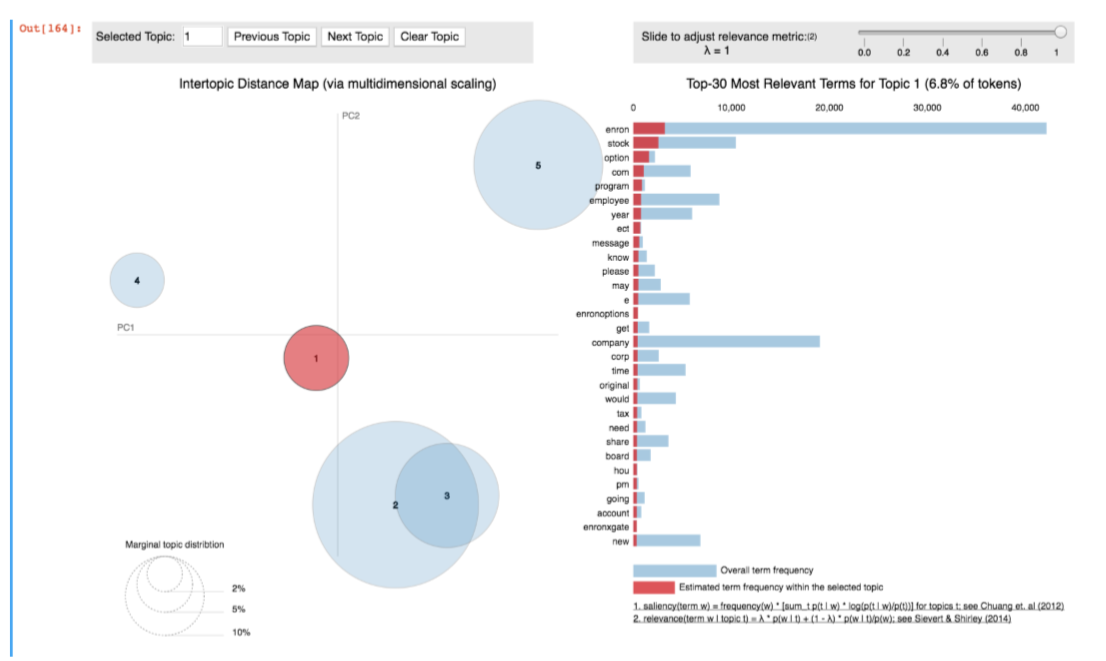
Topic 1 seems to discuss the employee share option program, and seems to point to internal conversation (with "please, may, know" etc), so this is more likely to be related to the internal accounting fraud and trading stock with insider knowledge. Topic 3 seems to be more related to general news around Enron.

### Finding fraudsters based on topic
In this exercise you're going to link the results from the topic model back to your original data. You now learned that you want to flag everything related to topic 3. As you will see, this is actually not that straightforward. You'll be given the function get_topic_details() which takes the arguments ldamodel and corpus. It retrieves the details of the topics for each line of text. With that function, you can append the results back to your original data. If you want to learn more detail on how to work with the model results, which is beyond the scope of this course, you're highly encouraged to read this article (https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/).

Available for you are the dictionary and corpus, the text data text_clean as well as your model results ldamodel. Also defined is get_topic_details().

In [ ]:
# Run get_topic_details function and check the results
print(get_topic_details(ldamodel, corpus))

In [ ]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
topic_details.head()

In [ ]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text':text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)

# Create flag for text highest associated with topic 3
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
print(topic_details.head())

You have now flagged all data that is highest associated with topic 3, that seems to cover internal conversation about enron stock options. You are a true detective. With these exercises you have demonstrated that text mining and topic modeling can be a powerful tool for fraud detection.

### Summary
* We may apply all types of machine learning algorithms to handle anomaly and fraud detection. 
    * Supervised learning such as classification algorithms, neural network, etc. 
    * Unsupervised learning such as clustering algorithms. 
    * All the linear or nonlinear dimension reduction techniques that can be used directly to handle anomaly detection, or can be combined with other supervised/unsupervised learning algorithm. 
    * Natural language processing.
    
* Directly constructing Gaussian distribution (or other contributions) and flag outliers. 

* Use network analysis for fraud or anomaly detection. 
